In [2]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,Sequential
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

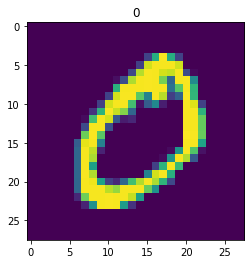

In [12]:
plt.imshow(x_train[1])
plt.title(y_train[1]);

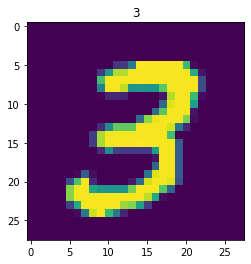

In [13]:
plt.imshow(x_train[7])
plt.title(y_train[7]);

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

In [20]:
x_train = tf.expand_dims(x_train, axis =-1)


In [21]:
x_test = tf.expand_dims(x_test, axis =-1)

In [37]:
cnn = Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(16,activation='relu'),
    layers.Dense(10,activation='softmax')
])


cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3287 - accuracy: 0.8987 - val_loss: 0.1121 - val_accuracy: 0.9703
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0914 - accuracy: 0.9741 - val_loss: 0.0783 - val_accuracy: 0.9782
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0594 - accuracy: 0.9824 - val_loss: 0.0689 - val_accuracy: 0.9818
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0612 - val_accuracy: 0.9842
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0776 - val_accuracy: 0.9812
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0630 - val_accuracy: 0.9846
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0584 - val_accuracy:

In [38]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9878


[0.05587533116340637, 0.9878000020980835]

In [32]:
y_prob = cnn.predict(x_test)
y_pred = y_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.9878

In [39]:

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



So we are getting an accuracy of almost around 99% with a simple cnn model.